<a href="https://colab.research.google.com/github/Rishit-dagli/10-Days-of-ML/blob/master/Day%205/Day%205/Transfer%20Learning%20approach/TL%20solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats and Dogs
-[Rishit Dagli](rishitdagli.ml)

## About Me

[Twitter](https://twitter.com/rishit_dagli)

[GitHub](https://github.com/Rishit-dagli)

[Medium](https://medium.com/@rishit.dagli)

## Import libraries

You can get the `h5` saved model via the below mentioned command, I have commented  it now

In [3]:
import os

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model


!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

  
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TensorFlow is already loaded. Please restart the runtime to change versions.
--2020-03-27 13:10:04--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.193.208, 2607:f8b0:4007:804::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.193.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5.2’

inception_v3_weight 100%[===================>]  83.84M   335MB/s    in 0.3s    

2020-03-27 13:10:05 (335 MB/s) - ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5.2’ saved [87910968/87910968]



## Pre trained model

Now we will make a pre tarined model with the Inception

In [0]:
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False)

Let's now load the weights from the Inception model and see the model summary of it

In [10]:
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

And!!! it's huge, what did you expect

## Customising it

Now we will tell the model to use the model till a particular layer which I call the last layer and customise and then train some layers under it

In [11]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


Train the layer under it

In [0]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

In [13]:
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Load the data

To know more about what I did and explanations I have used the same code as in my other solution notebook please read that

In [16]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

--2020-03-27 13:14:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.11.80, 2607:f8b0:4007:801::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.11.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.2’

cats_and_dogs_filte 100%[===================>]  65.43M   367MB/s    in 0.2s    

2020-03-27 13:14:50 (367 MB/s) - ‘cats_and_dogs_filtered.zip.2’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  


## Training

In [17]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 1)

Epoch 1/20
100/100 [==============================] - 31s 315ms/step - loss: 0.5123 - acc: 0.7535 - val_loss: 0.4105 - val_acc: 0.8840
Epoch 2/20
100/100 [==============================] - 20s 199ms/step - loss: 0.3629 - acc: 0.8425 - val_loss: 0.4115 - val_acc: 0.9100
Epoch 3/20
100/100 [==============================] - 20s 200ms/step - loss: 0.3479 - acc: 0.8410 - val_loss: 0.5457 - val_acc: 0.9080
Epoch 4/20
100/100 [==============================] - 20s 205ms/step - loss: 0.3581 - acc: 0.8540 - val_loss: 0.4097 - val_acc: 0.9280
Epoch 5/20
100/100 [==============================] - 20s 201ms/step - loss: 0.3124 - acc: 0.8690 - val_loss: 0.2373 - val_acc: 0.9550
Epoch 6/20
100/100 [==============================] - 20s 205ms/step - loss: 0.3034 - acc: 0.8665 - val_loss: 0.4153 - val_acc: 0.9380
Epoch 7/20
100/100 [==============================] - 20s 202ms/step - loss: 0.3010 - acc: 0.8730 - val_loss: 0.3124 - val_acc: 0.9540
Epoch 8/20
100/100 [==============================] - 2

## Some plots

Make a loss and accuracy graph

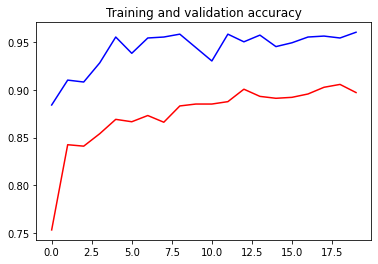

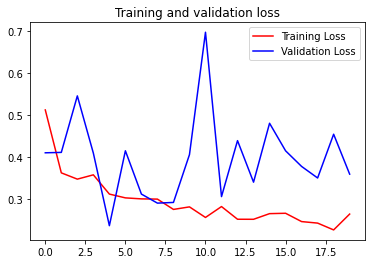

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Conclusion

We did too well and also did not overfit the data, this is so wonderful